In [10]:
from astroquery.mast import Observations
from datetime import datetime
import os

### Sort Observations by Mission

In [27]:
meta_table = Observations.get_metadata("observations")
meta_table

Column Name,Column Label,Data Type,Units,Description,Examples/Valid Values
str21,str25,str7,str10,str72,str116
intentType,Observation Type,string,,Whether observation is for science or calibration.,"Valid values: science, calibration"
obs_collection,Mission,string,,Collection,"E.g. SWIFT, PS1, HST, IUE"
provenance_name,Provenance Name,string,,"Provenance name, or source of data","E.g. TASOC, CALSTIS, PS1"
instrument_name,Instrument,string,,Instrument Name,"E.g. WFPC2/WFC, UVOT, STIS/CCD"
project,Project,string,,Processing project,"E.g. HST, HLA, EUVE, hlsp_legus"
filters,Filters,string,,Instrument filters,"F469N, NUV, FUV, LOW DISP, MIRROR"
wavelength_region,Waveband,string,,Energy Band,"EUV, XRAY, OPTICAL"
target_name,Target Name,string,,Target Name,Ex. COMET-67P-CHURYUMOV-GER-UPDATE
target_classification,Target Classification,string,,Type of target,Ex. COMET;COMET BEING ORBITED BY THE ROSETTA SPACECRAFT;SOLAR SYSTEM


In [32]:
jw = Observations.query_criteria(calib_level=3, intentType='science', dataproduct_type='IMAGE', obs_collection='JWST')

In [44]:
Observations.query_criteria_count(dataRights='public', calib_level=3, intentType='science', dataproduct_type='IMAGE', obs_collection='JWST')

11920

In [34]:
datalist = jw[jw['dataproduct_type'] == 'image']

In [35]:
len(datalist)

14147

In [7]:
# Your example product identifier
product_id = "jw01145-o002_t001_fgs_clear_i2d.jpg"

In [8]:
# MAST product path for the file you want
product_path = "mast:JWST/product/jw01145-o002_t001_fgs_clear_i2d.jpg"

# Download the file directly
file_path = Observations.download_file(product_path, local_path="test1.jpg", cache=True)

print(f"Downloaded file to {file_path}")

INFO: Found cached file test1.jpg with expected size 872635. [astroquery.query]
Downloaded file to ('COMPLETE', None, None)


In [17]:
xx = Observations.filter_products(datalist, jpegURL=product_path)

In [21]:
product_path.split('/')[-1]

'jw01145-o002_t001_fgs_clear_i2d.jpg'

In [ ]:
Observations.download_products

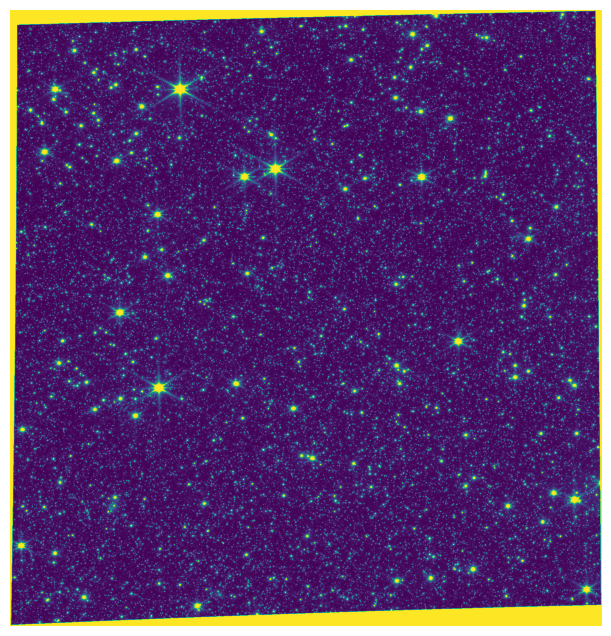

In [7]:
from PIL import Image
import matplotlib.pyplot as plt

# Open and display the downloaded JPG image
image = Image.open('data_03_47/jw01145-o005_t001_fgs_clear_i2d.jpg')
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis("off")
plt.show()

In [12]:
jw[0]['jpegURL']

'mast:JWST/product/jw01410-o031_t040_nircam_clear-f480m_i2d.jpg'

In [3]:
jw = Observations.query_criteria(obs_collection='JWST')
datalist = jw[jw['dataproduct_type'] == 'image']
current_time = datetime.now().strftime("%H_%M")

In [4]:
# Specify the directory name and path
directory_name = './data_' + str(current_time) +'/'
path = "./" + directory_name  # Creates the directory in the current working directory
# Create the directory
os.mkdir(path)

In [42]:
from s3fs.core import S3FileSystem
s3 = S3FileSystem()
datum = datalist[0]
product_path = datum['jpegURL']
dl_dir='/tmp/'
ul_dir='s3://ece5984-s3-perindom/hwo_datalake/'
save_file_path = Observations.download_file(product_path, local_path=dl_dir+product_path.split('/')[-1], cache=True)


In [43]:
# Upload the file
s3.put(dl_dir+product_path.split('/')[-1], ul_dir)

NoCredentialsError: Unable to locate credentials

In [5]:
i = 0
for row in datalist:
    product_path = row['jpegURL']
    save_file_path = Observations.download_file(product_path, local_path=directory_name+product_path.split('/')[-1], cache=True)
    i += 1
    if i > 1000:
        break

AttributeError: 'MaskedConstant' object has no attribute 'split'

In [15]:
jw[0]

intentType,obs_collection,provenance_name,instrument_name,project,filters,wavelength_region,target_name,target_classification,obs_id,s_ra,s_dec,dataproduct_type,proposal_pi,calib_level,t_min,t_max,t_exptime,em_min,em_max,obs_title,t_obs_release,proposal_id,proposal_type,sequence_number,s_region,jpegURL,dataURL,dataRights,mtFlag,srcDen,obsid,objID
str11,str4,str7,str14,str4,str25,str8,str31,str130,str67,float64,float64,str12,str37,int64,float64,float64,float64,float64,float64,str164,float64,str4,str6,int64,str184,str93,str94,str16,bool,float64,str9,str9
calibration,JWST,CALJWST,NIRCAM/IMAGE,JWST,F480M,Infrared,LOS-TARGET-NIRCAM,--,jw01410-o031_t040_nircam_clear-f480m,118.155,-74.09916666666663,image,"Nelan, Edmund",3,59625.48724716956,59625.50153800926,1223.992,4662.0,4977.0,LOS-2 ACS Fine Guidance Control Verification,59774.8541666,1410,COM,--,POLYGON 118.107889424 -74.103885134 118.171032133 -74.072161312 118.287180506 -74.089483221 118.224196803 -74.121240755,mast:JWST/product/jw01410-o031_t040_nircam_clear-f480m_i2d.jpg,mast:JWST/product/jw01410-o031_t040_nircam_clear-f480m_i2d.fits,PUBLIC,False,nan,71673671,232275043


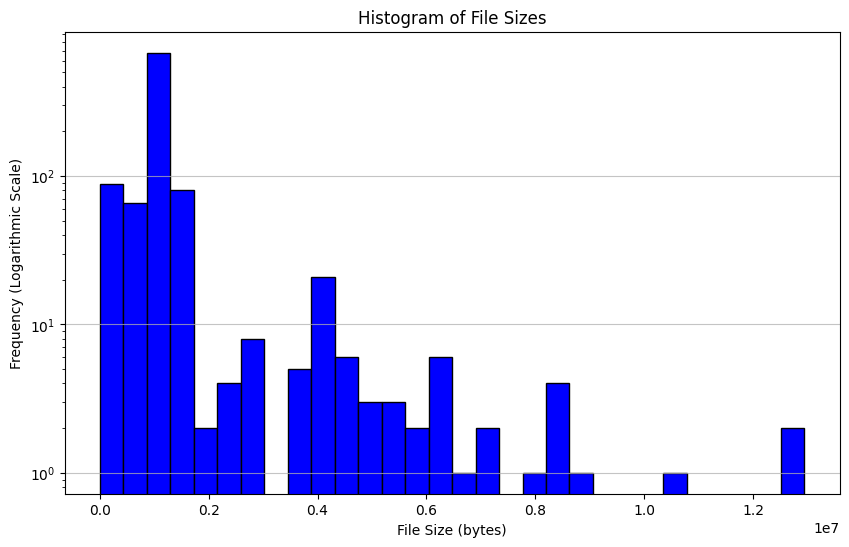

In [10]:
import os
import matplotlib.pyplot as plt

# Specify the directory path
directory_path = '/main/data_20_22'

# Get the sizes of all files in the directory
file_sizes = []
for file in os.listdir(directory_path):
    file_path = os.path.join(directory_path, file)
    if os.path.isfile(file_path):
        file_sizes.append(os.path.getsize(file_path))

# Plot the histogram of file sizes
plt.figure(figsize=(10, 6))
plt.hist(file_sizes, bins=30, color='blue', edgecolor='black')
plt.title('Histogram of File Sizes')
plt.xlabel('File Size (bytes)')
plt.ylabel('Frequency (Logarithmic Scale)')
plt.yscale('log')
plt.grid(axis='y', alpha=0.75)
plt.show()


In [77]:
def apply_perturbations_to_jpeg(image_array):
    """
    Add noise, missing values, and random corruption to a JPEG image represented as a numpy array.
    """
    NOISE_STD = 10
    MISSING_VALUE_PROB = 0.01
    DATA_CORRUPTION_PROB = 0.01
    
    # Ensure image has 3 channels (RGB)
    if image_array.ndim == 2:  # Grayscale image
        image_array = np.stack([image_array] * 3, axis=-1)  # Convert grayscale to RGB
    
    perturbed = image_array.copy()

    # Apply Gaussian noise
    perturbed = perturbed.astype(np.float32)
    perturbed += np.random.normal(0, NOISE_STD, perturbed.shape)

    # Introduce missing values (set some pixels to NaN)
    missing_mask = np.random.rand(*perturbed.shape[:2]) < MISSING_VALUE_PROB
    for channel in range(perturbed.shape[2]):
        perturbed[missing_mask, channel] = np.nan

    # Apply random corruption
    corruption_mask = np.random.rand(*perturbed.shape[:2]) < DATA_CORRUPTION_PROB
    for channel in range(perturbed.shape[2]):
        perturbed[corruption_mask, channel] = np.random.uniform(
            low=np.nanmin(perturbed[:, :, channel]),
            high=np.nanmax(perturbed[:, :, channel]),
            size=corruption_mask.sum()
        )
    # Replace NaN values with 0 (or another placeholder value)
    perturbed = np.nan_to_num(perturbed, nan=0)

    # Clip values to valid range for image data
    perturbed = np.clip(perturbed, 0, 255)

    return perturbed.astype(np.uint8)

In [78]:
from PIL import Image
import numpy as np

In [79]:
with open('data_20_22/jw01057-o004_t001_nircam_clear-f070w_i2d.jpg', 'rb') as f:
    img = Image.open(f)
    imar = np.array(img)

In [80]:
noise = apply_perturbations_to_jpeg(imar)

In [81]:
print(noise)

[[[255 249 255]
  [249 255 253]
  [245 248 254]
  ...
  [255 251 252]
  [255 252 255]
  [243 255 255]]

 [[255 246 234]
  [251 246 250]
  [251 237 255]
  ...
  [248 255 255]
  [254 243 255]
  [254 249 246]]

 [[251 255 250]
  [255 251 253]
  [255 255 237]
  ...
  [255 241 255]
  [242 255 242]
  [250 247 255]]

 ...

 [[255 255 255]
  [245 255 253]
  [250 255 242]
  ...
  [251 247 243]
  [253 236 255]
  [244 255 250]]

 [[255 250 254]
  [196  74 255]
  [255 248 247]
  ...
  [254 255 252]
  [240 254 255]
  [255 255 255]]

 [[255 245 252]
  [255 255 255]
  [255 255 244]
  ...
  [255 255 251]
  [245 253 241]
  [252 255 239]]]
